<a href="https://colab.research.google.com/github/nguyenngoctruong2k1/CS114.L22.KHCL/blob/main/plot_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #CS114.L22.KHCL
## THÀNH VIÊN NHÓM
  + 17520757 - Nguyễn Văn Minh
  + 18521640 - Kiều Quang Việt
  + 19522440 - Nguyễn Ngọc Trưởng

## YÊU CẦU

- Yêu cầu code: tạo một notebook colab với các đoạn code và chú thích cần thiết để thực hiện công việc sau:
  - Train model cho bài toán hand-written digits recognition theo example của sklearn: https://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html#sphx-glr-auto-examples-classification-plot-digits-classification-py
  - Truy cập webcam của máy tính từ colab.
  - Chụp ảnh một tờ giấy đang được giơ ra trước webcam
  - Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy.
- Yêu cầu phân tích: Thông qua thực nghiệm chạy thử nhiều lần trả lời các câu hỏi sau
  - Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
  - Nhìn vào đâu để kết luận là tốt hay không?
    - Nếu không tốt thì lý do tại sao?
    - Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?

## A. YÊU CẦU CODE

In [ ]:
%matplotlib inline

### I. Train model cho bài toán hand-written digits recognition

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


#### Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



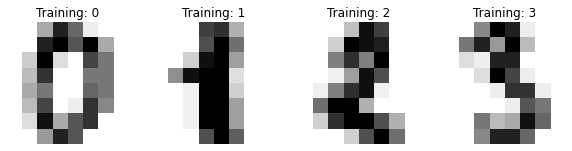

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

#### Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# print(type(X_train[0][0]))

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



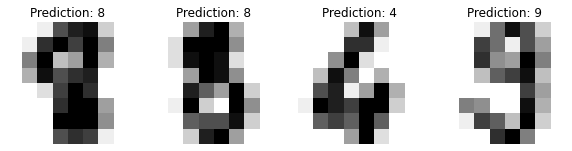

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


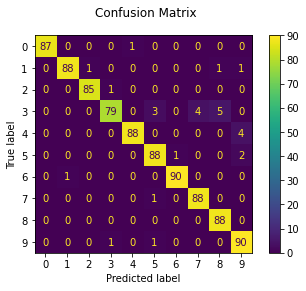

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

### II.Truy cập webcam của máy tính từ colab

In [ ]:
# Nguồng <Code snippets> Google Colab
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.png', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

### III. Chụp ảnh một tờ giấy đang được giơ ra trước webcam
- Task 1: Chụp ảnh từ webcam
- Task 2: Lưu ảnh thành mảng numpy size 64 (X_real)
- Task 3: Yêu cầu nhập từ màng hình số thật của ảnh chụp (Để sử dụng trong việc phân tích đánh giá) (y_real)
  => Khi đó ta được X_real và y_real
- Task 4: Cho phép lặp lại nhiều lần, và lưu kiểu dữ liệu trong 1 list

Nhận xét kiểu dữ liệu của dateset:
  - X_train : numpy 2 chiều kiểu dữ liệu 'numpy.float64'
  - y_train : numpy 1 chiều kiểu dữ liệu 'numpy.int64'

In [ ]:
from IPython.display import Image
import numpy as np
import cv2
import PIL.Image
from PIL import Image, ImageOps
from google.colab.patches import cv2_imshow

In [ ]:
# Nguồn: Tham khảo từ https://github.com/caohungphu/CS114.L21/blob/main/Colab/Recognizing_hand_written_digits.ipynb
# Đã chỉnh sửa phù hợp để sử dụng riêng . Ngày 22/4/2021

# Hàm chuyển ảnh về chữ đen, nền trắng
def getBlackWhiteImage(filename):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám (GrayScale)
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # Làm mịn hình ảnh với cv2.GaussianBlur
    image_blur = cv2.GaussianBlur(image, (5, 5), 0)
    # Chuyển ảnh về chữ đen, nền trắng theo ngưỡng của phương thức Ostu (Mục 4.1, STT: 5)
    ret, ostu_thresh = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # Lưu ảnh chữ trắng, nền đen
    cv2.imwrite(filename, ostu_thresh)

# Hàm chuyển ảnh từ 'chữ đen, nền trắng' sang 'chữ trắng, nền đen'
def convertWhiteBlackImage(filename):
    # Đọc ảnh với thư viện PIL
    image = PIL.Image.open(filename)
    # Dùng ImageOps.invert để chuyển đổi 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' (Mục 4.1, STT: 6)
    image_result = ImageOps.invert(image)
    # Lưu ảnh đã invert
    image_result.save(filename)
    # Trả về tên file ảnh 'chữ trắng, nền đen'

def resizeImage(filename):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # Resize ảnh
    image_8_8 = cv2.resize(image, (8, 8), interpolation = cv2.INTER_AREA)
    # Lưu ảnh 8x8
    cv2.imwrite(filename, image_8_8)    

# Hàm trả về kết quả predict được từ ảnh 8x8
def getResult(filename):
    # Đọc ảnh với thư viện OpenCV và chuyển về ảnh mức xám
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    # Chuyển các giá trị ảnh 8x8 về trong khoảng [0, 1]
    image = image / 255 * 15
    # Định hình lại ma trận từ (8, 8) sang (1, 64) để mô hình predict được
    image_predict = image.reshape(1, 64)
    
    show(filename)
    #Trả về kết quả đã predict được
    return clf.predict(image_predict)[0]

def XULYANH(filename):
    # Chuyển ảnh gốc sang 'chữ đen, nền trắng'
    getBlackWhiteImage(filename)
    # Chuyển ảnh 'chữ đen, nền trắng' sang 'chữ trắng, nền đen' 
    convertWhiteBlackImage(filename)
    # Resize ảnh về (8, 8) 
    resizeImage(filename)

def show(filename):
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (300, 300), interpolation = cv2.INTER_AREA)
    cv2.imwrite("image_show.jpg",image)
    display(Image("image_show.jpg"))


### IV. Nhận dạng xem chữ số đang viết trên tờ giấy là số mấy

Input [ 0 ]


<IPython.core.display.Javascript object>

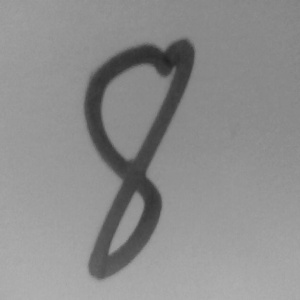

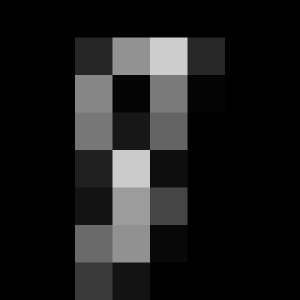

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 1 ]


<IPython.core.display.Javascript object>

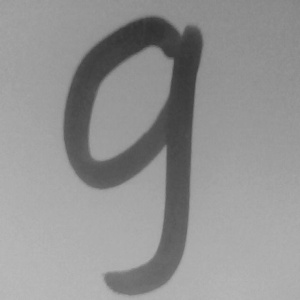

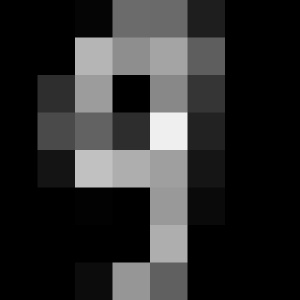

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 2 ]


<IPython.core.display.Javascript object>

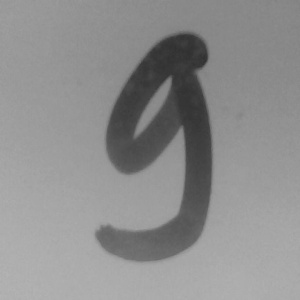

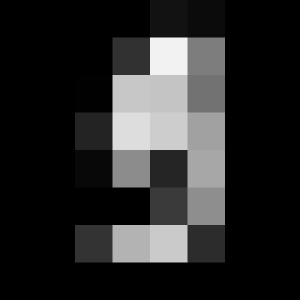

Kết quả học được:  1
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 3 ]


<IPython.core.display.Javascript object>

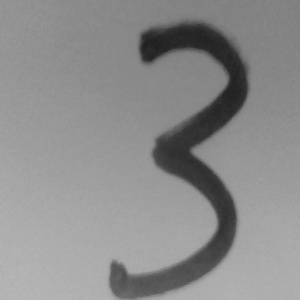

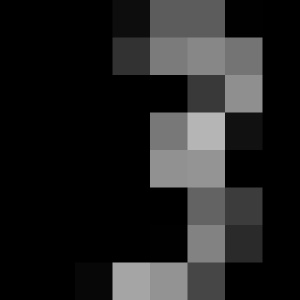

Kết quả học được:  3
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 4 ]


<IPython.core.display.Javascript object>

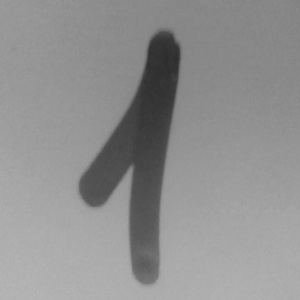

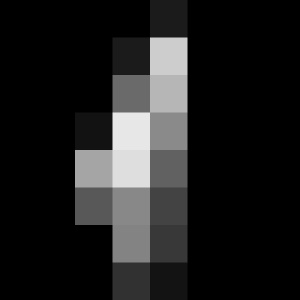

Kết quả học được:  1
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 5 ]


<IPython.core.display.Javascript object>

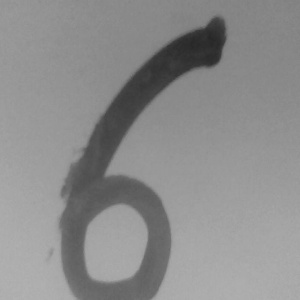

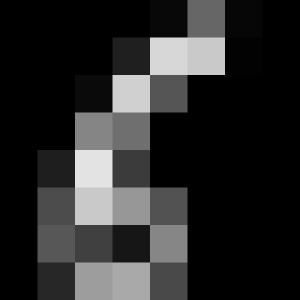

Kết quả học được:  8
Kết quả đúng của hình là: 6
Nhập 1 để tiếp tục : 1
Input [ 6 ]


<IPython.core.display.Javascript object>

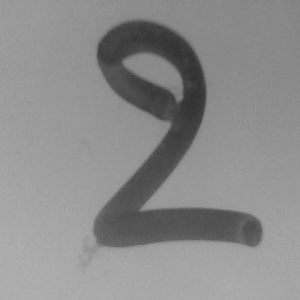

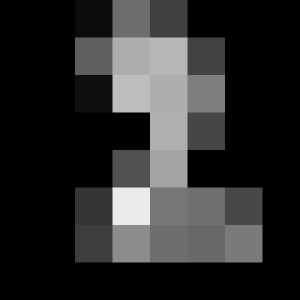

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 7 ]


<IPython.core.display.Javascript object>

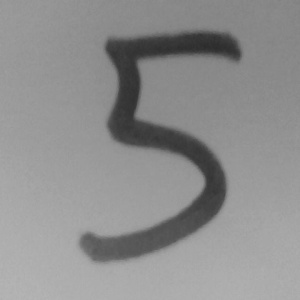

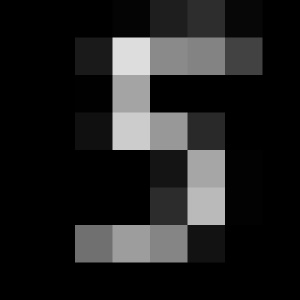

Kết quả học được:  5
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 8 ]


<IPython.core.display.Javascript object>

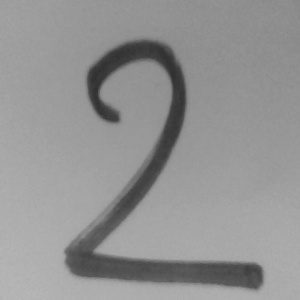

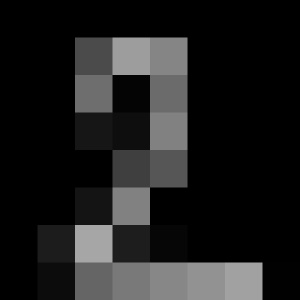

Kết quả học được:  2
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 9 ]


<IPython.core.display.Javascript object>

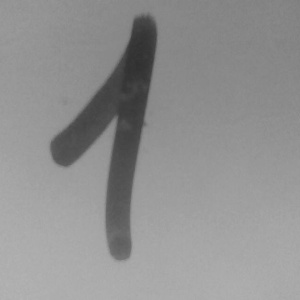

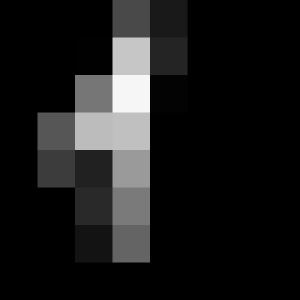

Kết quả học được:  4
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 10 ]


<IPython.core.display.Javascript object>

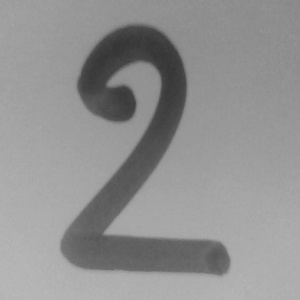

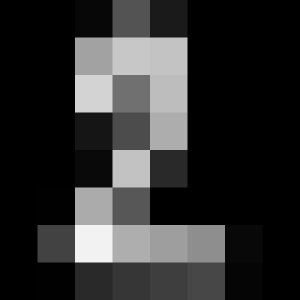

Kết quả học được:  2
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 11 ]


<IPython.core.display.Javascript object>

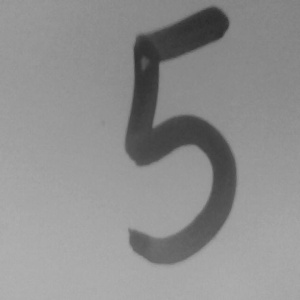

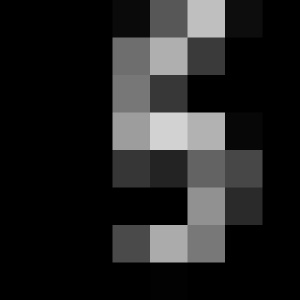

Kết quả học được:  9
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 12 ]


<IPython.core.display.Javascript object>

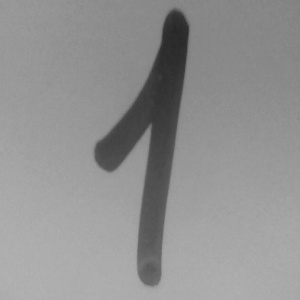

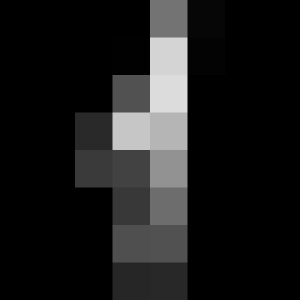

Kết quả học được:  1
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 13 ]


<IPython.core.display.Javascript object>

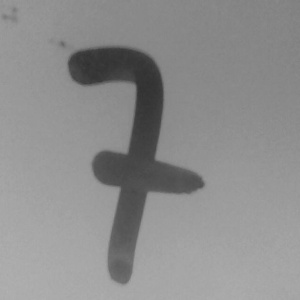

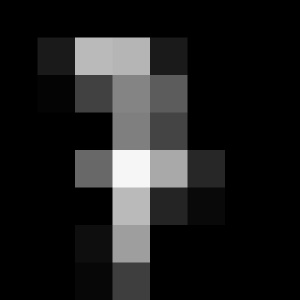

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 14 ]


<IPython.core.display.Javascript object>

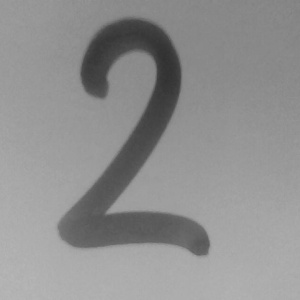

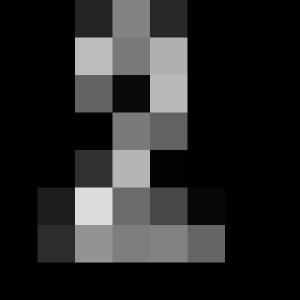

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 15 ]


<IPython.core.display.Javascript object>

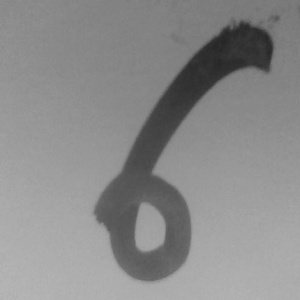

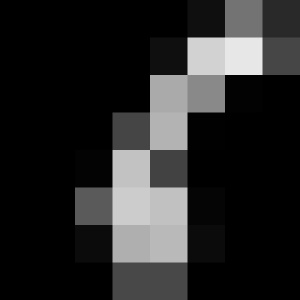

Kết quả học được:  7
Kết quả đúng của hình là: 6
Nhập 1 để tiếp tục : 1
Input [ 16 ]


<IPython.core.display.Javascript object>

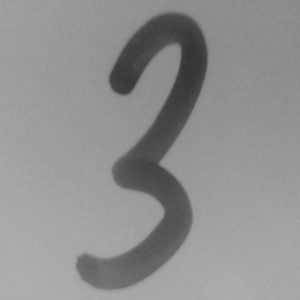

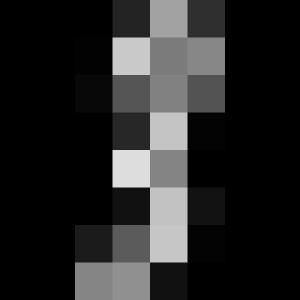

Kết quả học được:  3
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 17 ]


<IPython.core.display.Javascript object>

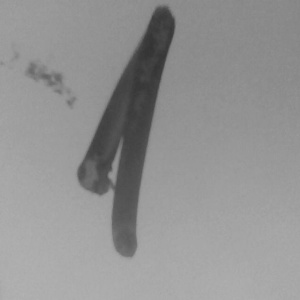

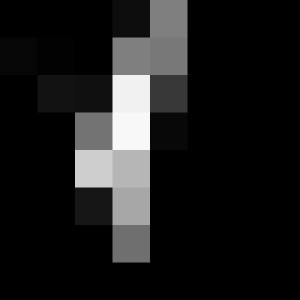

Kết quả học được:  1
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 18 ]


<IPython.core.display.Javascript object>

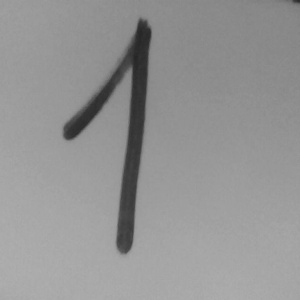

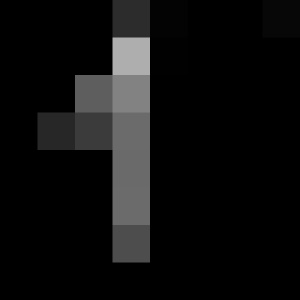

Kết quả học được:  9
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 19 ]


<IPython.core.display.Javascript object>

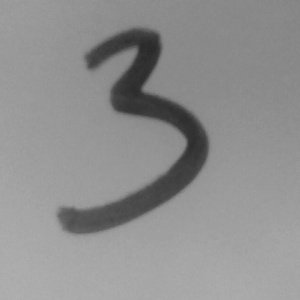

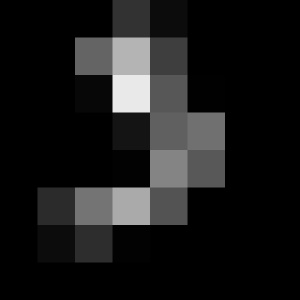

Kết quả học được:  7
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 20 ]


<IPython.core.display.Javascript object>

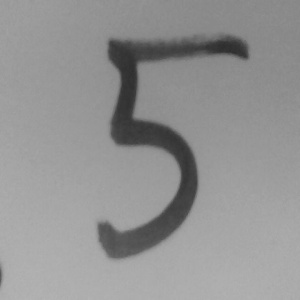

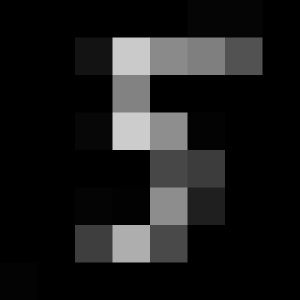

Kết quả học được:  7
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 21 ]


<IPython.core.display.Javascript object>

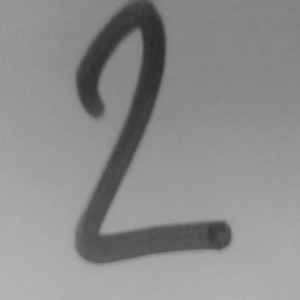

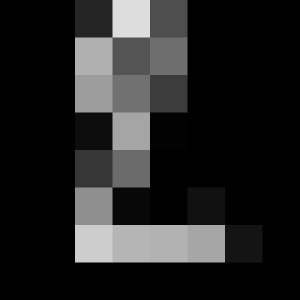

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 22 ]


<IPython.core.display.Javascript object>

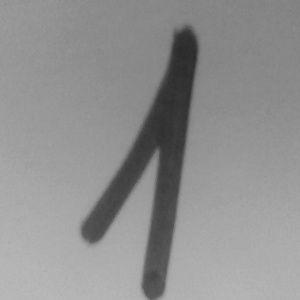

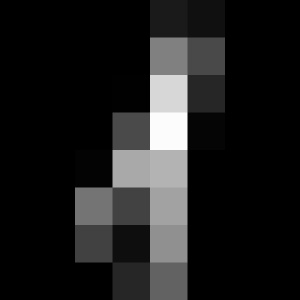

Kết quả học được:  1
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 23 ]


<IPython.core.display.Javascript object>

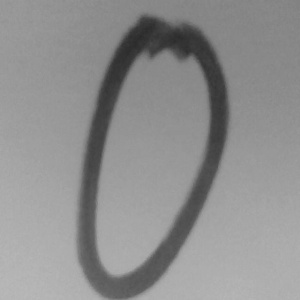

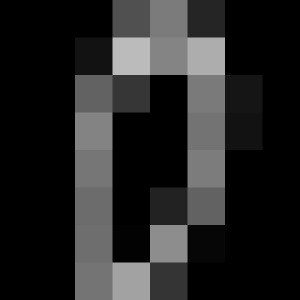

Kết quả học được:  0
Kết quả đúng của hình là: 0
Nhập 1 để tiếp tục : 1
Input [ 24 ]


<IPython.core.display.Javascript object>

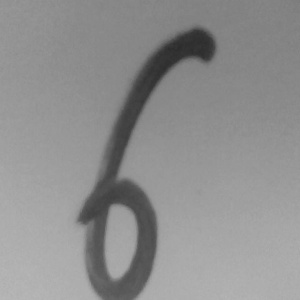

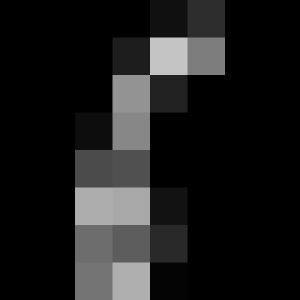

Kết quả học được:  8
Kết quả đúng của hình là: 6
Nhập 1 để tiếp tục : 1
Input [ 25 ]


<IPython.core.display.Javascript object>

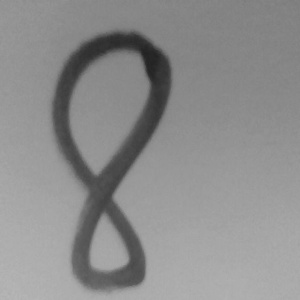

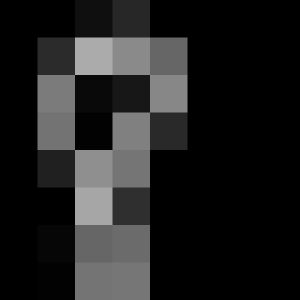

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 26 ]


<IPython.core.display.Javascript object>

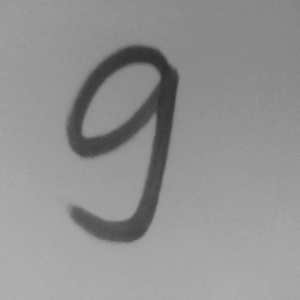

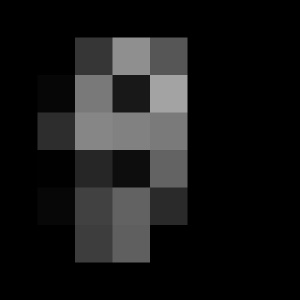

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 27 ]


<IPython.core.display.Javascript object>

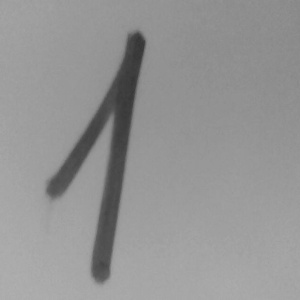

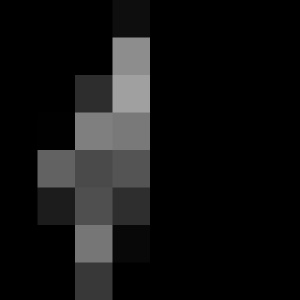

Kết quả học được:  4
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 28 ]


<IPython.core.display.Javascript object>

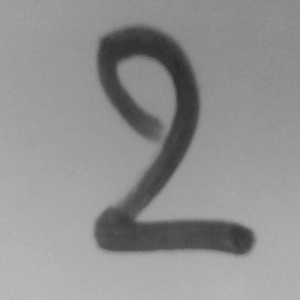

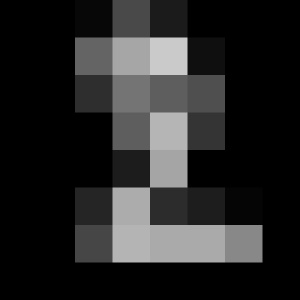

Kết quả học được:  2
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 29 ]


<IPython.core.display.Javascript object>

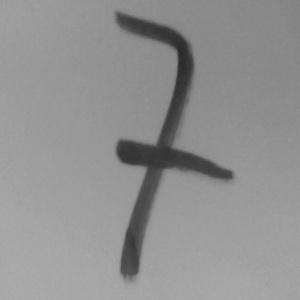

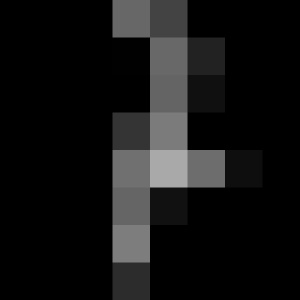

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 30 ]


<IPython.core.display.Javascript object>

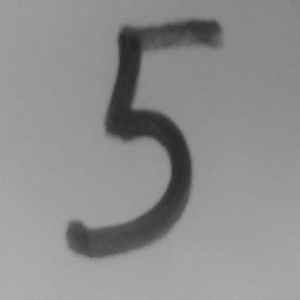

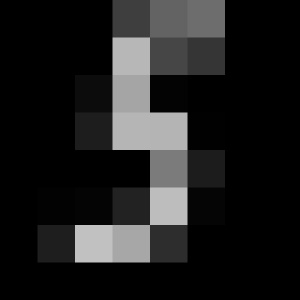

Kết quả học được:  8
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 31 ]


<IPython.core.display.Javascript object>

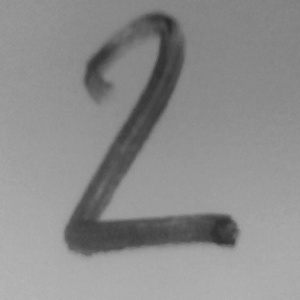

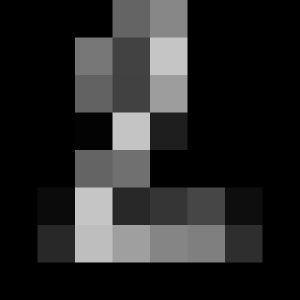

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 32 ]


<IPython.core.display.Javascript object>

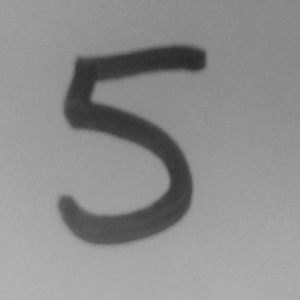

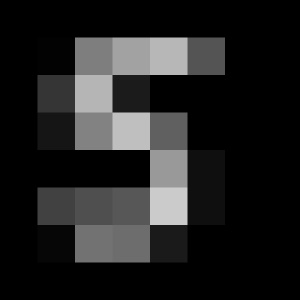

Kết quả học được:  5
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 33 ]


<IPython.core.display.Javascript object>

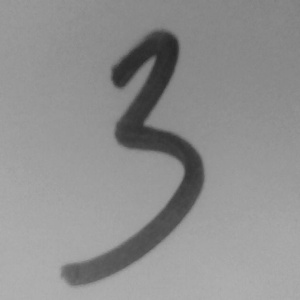

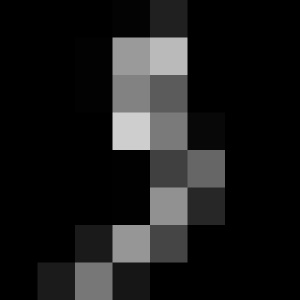

Kết quả học được:  7
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 34 ]


<IPython.core.display.Javascript object>

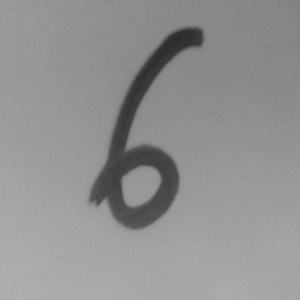

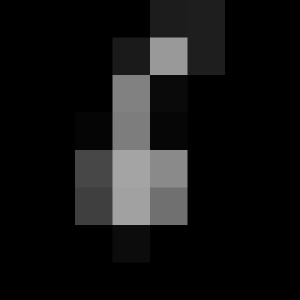

Kết quả học được:  7
Kết quả đúng của hình là: 6
Nhập 1 để tiếp tục : 1
Input [ 35 ]


<IPython.core.display.Javascript object>

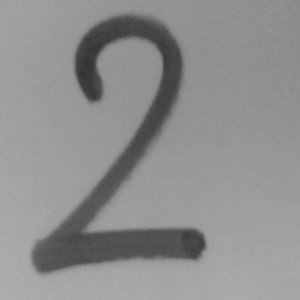

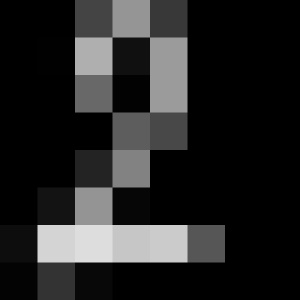

Kết quả học được:  2
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 36 ]


<IPython.core.display.Javascript object>

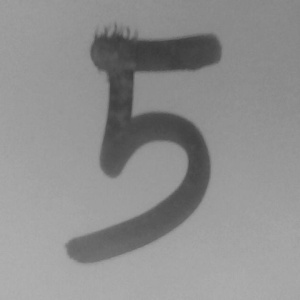

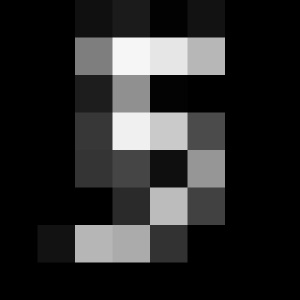

Kết quả học được:  5
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 37 ]


<IPython.core.display.Javascript object>

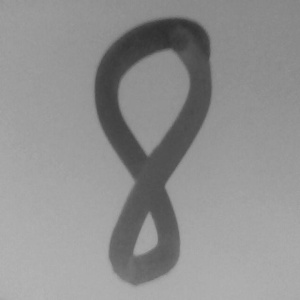

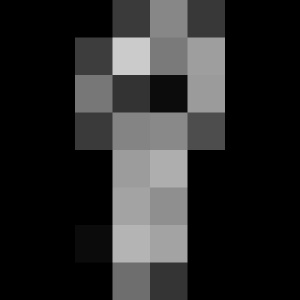

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 38 ]


<IPython.core.display.Javascript object>

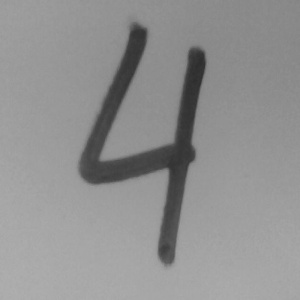

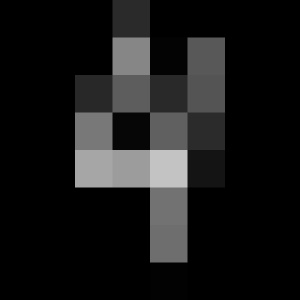

Kết quả học được:  4
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 39 ]


<IPython.core.display.Javascript object>

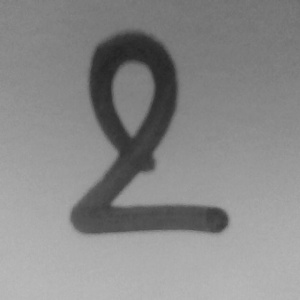

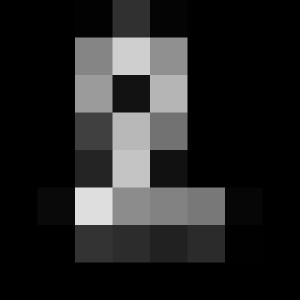

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 40 ]


<IPython.core.display.Javascript object>

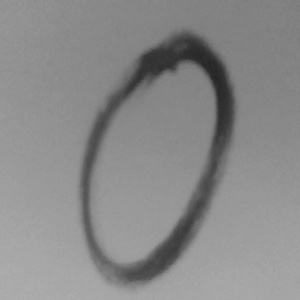

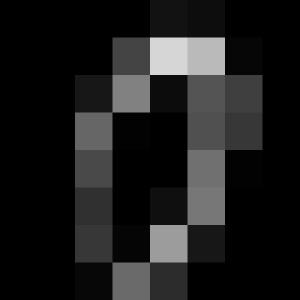

Kết quả học được:  7
Kết quả đúng của hình là: 0
Nhập 1 để tiếp tục : 1
Input [ 41 ]


<IPython.core.display.Javascript object>

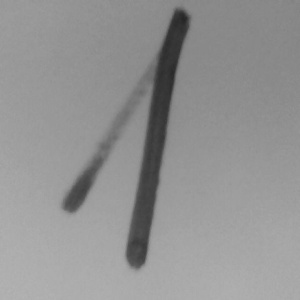

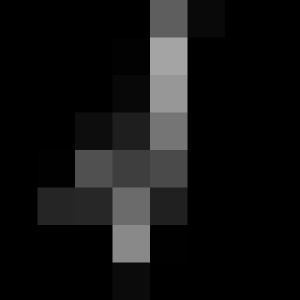

Kết quả học được:  7
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 42 ]


<IPython.core.display.Javascript object>

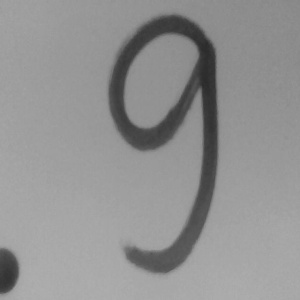

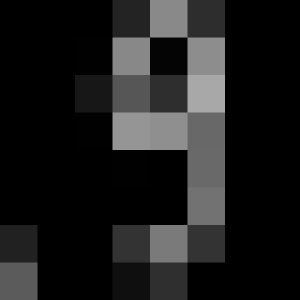

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 43 ]


<IPython.core.display.Javascript object>

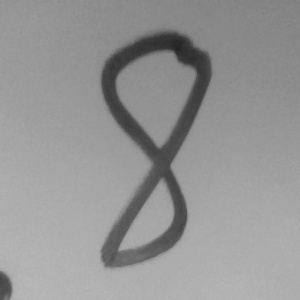

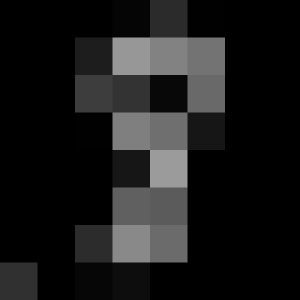

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 44 ]


<IPython.core.display.Javascript object>

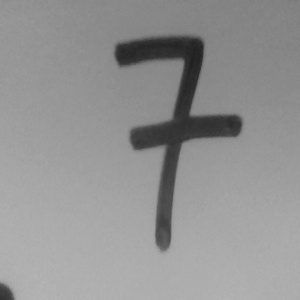

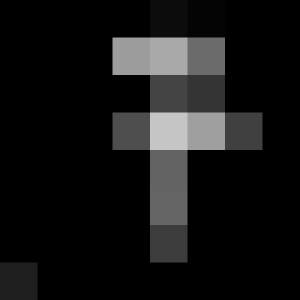

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 45 ]


<IPython.core.display.Javascript object>

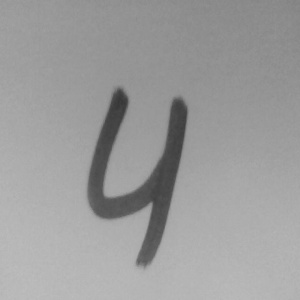

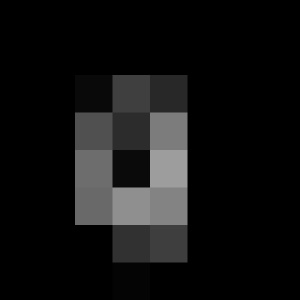

Kết quả học được:  4
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 46 ]


<IPython.core.display.Javascript object>

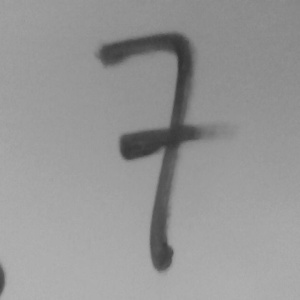

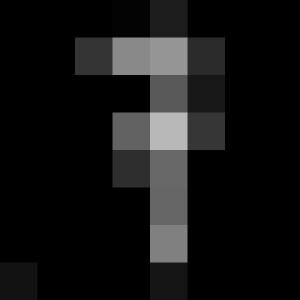

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 47 ]


<IPython.core.display.Javascript object>

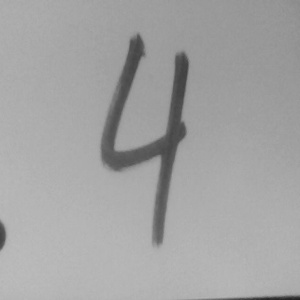

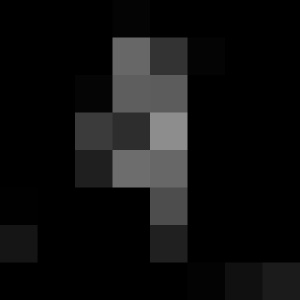

Kết quả học được:  9
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 48 ]


<IPython.core.display.Javascript object>

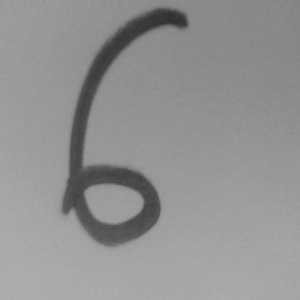

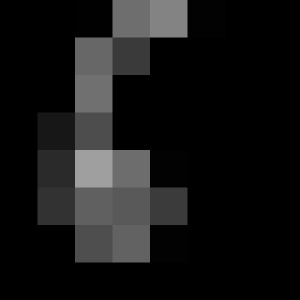

Kết quả học được:  4
Kết quả đúng của hình là: 6
Nhập 1 để tiếp tục : 1
Input [ 49 ]


<IPython.core.display.Javascript object>

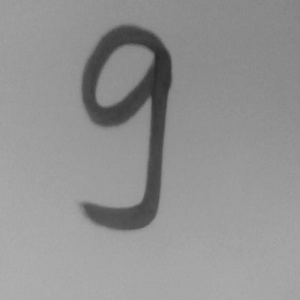

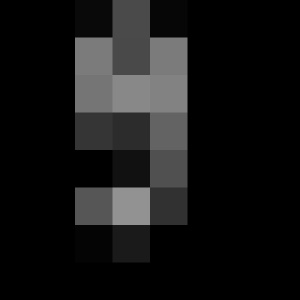

Kết quả học được:  7
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 50 ]


<IPython.core.display.Javascript object>

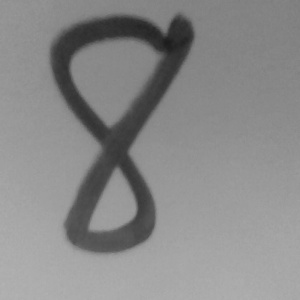

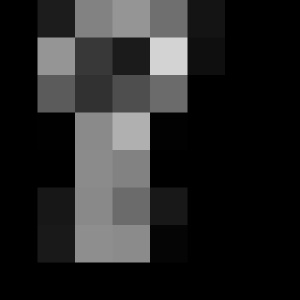

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 51 ]


<IPython.core.display.Javascript object>

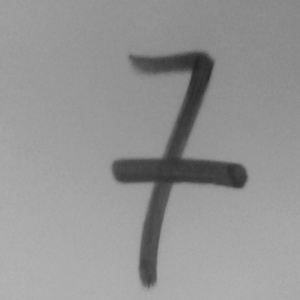

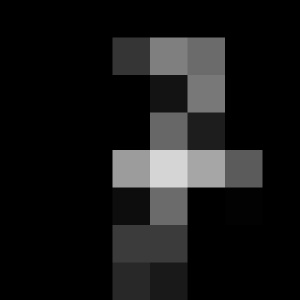

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 52 ]


<IPython.core.display.Javascript object>

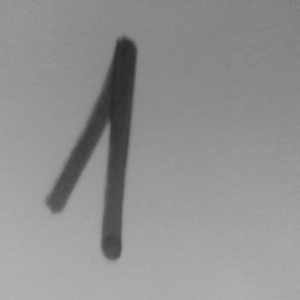

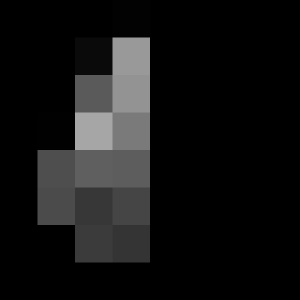

Kết quả học được:  4
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 53 ]


<IPython.core.display.Javascript object>

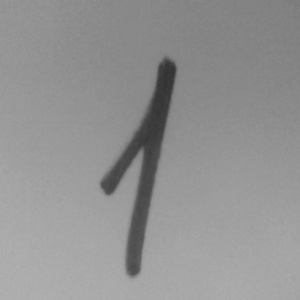

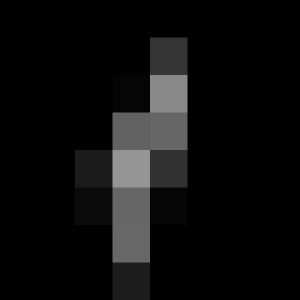

Kết quả học được:  7
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 54 ]


<IPython.core.display.Javascript object>

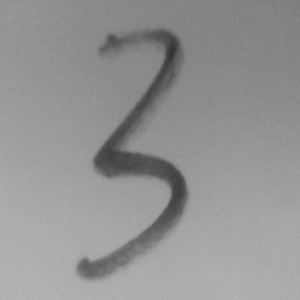

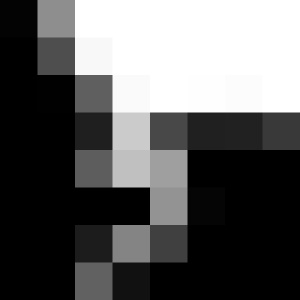

Kết quả học được:  7
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 55 ]


<IPython.core.display.Javascript object>

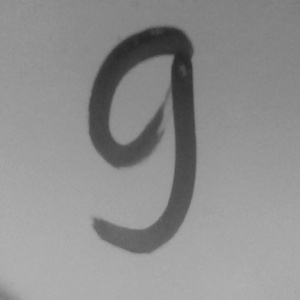

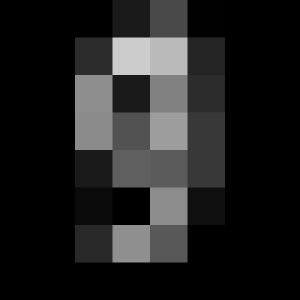

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 56 ]


<IPython.core.display.Javascript object>

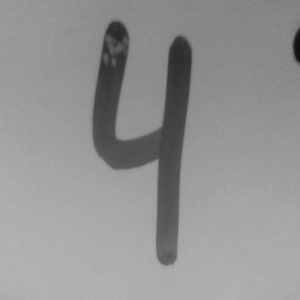

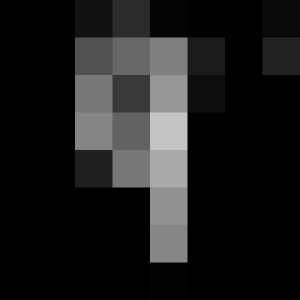

Kết quả học được:  9
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 57 ]


<IPython.core.display.Javascript object>

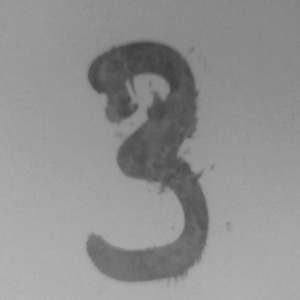

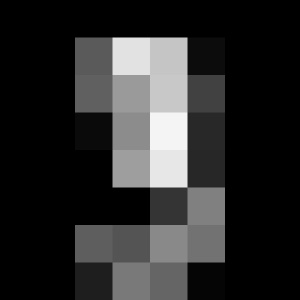

Kết quả học được:  3
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 58 ]


<IPython.core.display.Javascript object>

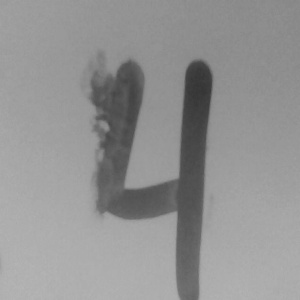

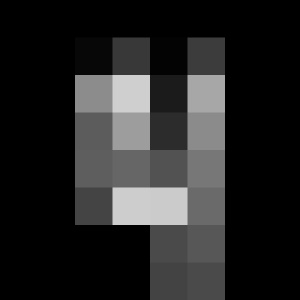

Kết quả học được:  4
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 59 ]


<IPython.core.display.Javascript object>

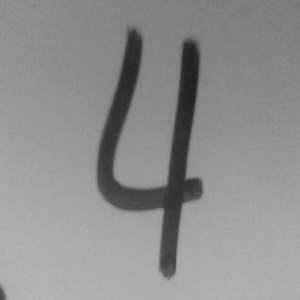

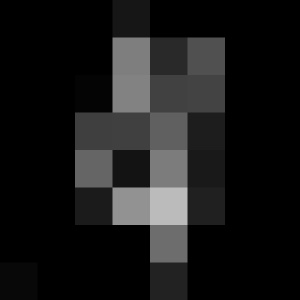

Kết quả học được:  4
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 60 ]


<IPython.core.display.Javascript object>

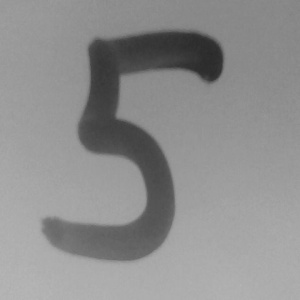

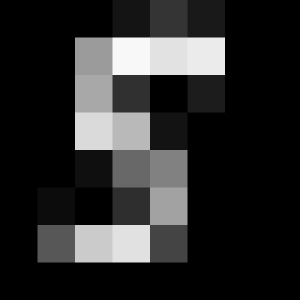

Kết quả học được:  5
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 61 ]


<IPython.core.display.Javascript object>

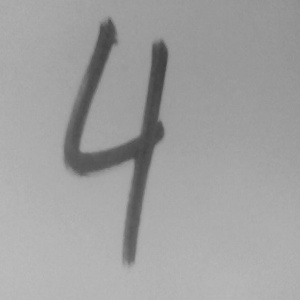

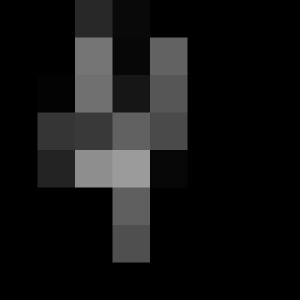

Kết quả học được:  9
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 62 ]


<IPython.core.display.Javascript object>

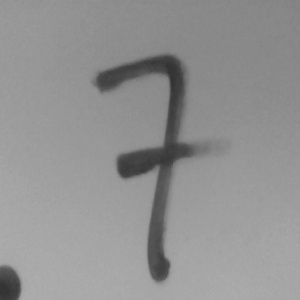

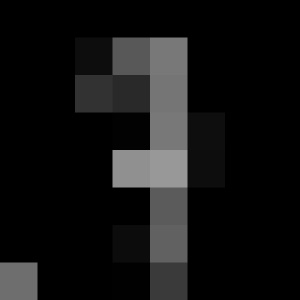

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 63 ]


<IPython.core.display.Javascript object>

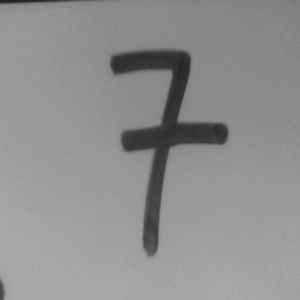

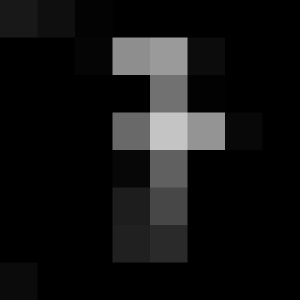

Kết quả học được:  9
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 64 ]


<IPython.core.display.Javascript object>

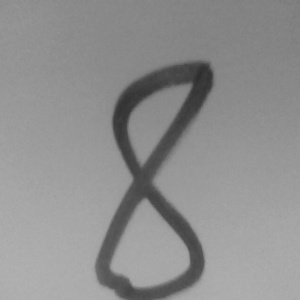

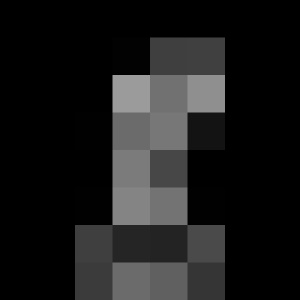

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 65 ]


<IPython.core.display.Javascript object>

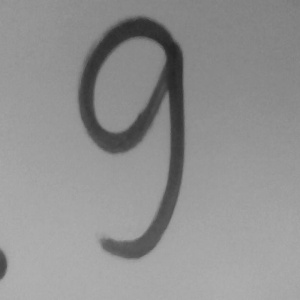

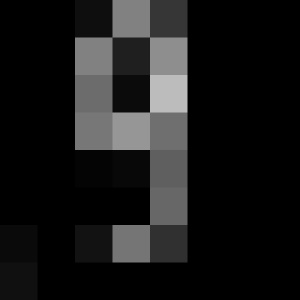

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 66 ]


<IPython.core.display.Javascript object>

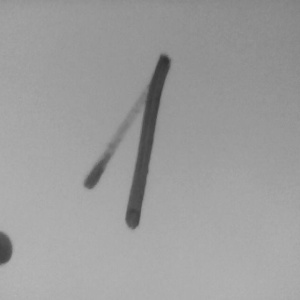

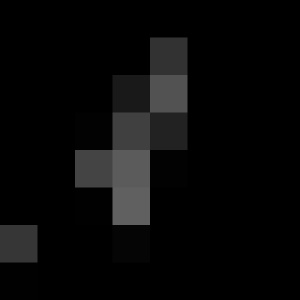

Kết quả học được:  7
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 67 ]


<IPython.core.display.Javascript object>

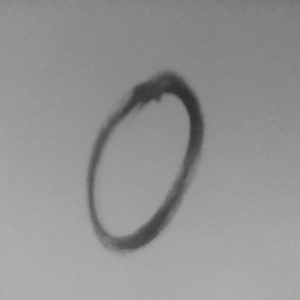

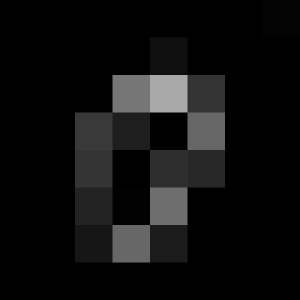

Kết quả học được:  7
Kết quả đúng của hình là: 0
Nhập 1 để tiếp tục : 1
Input [ 68 ]


<IPython.core.display.Javascript object>

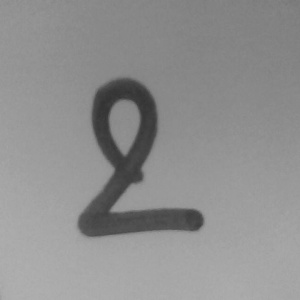

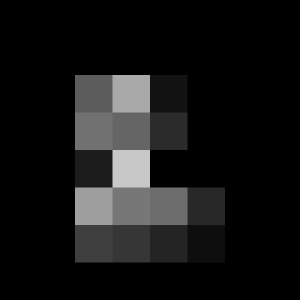

Kết quả học được:  4
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 69 ]


<IPython.core.display.Javascript object>

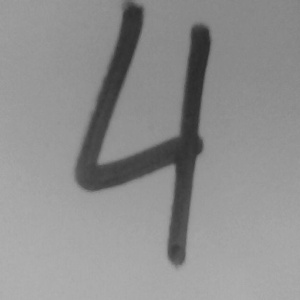

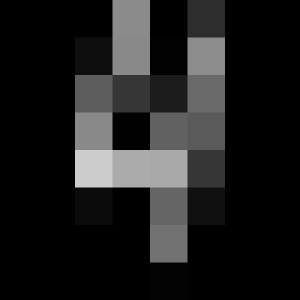

Kết quả học được:  7
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 70 ]


<IPython.core.display.Javascript object>

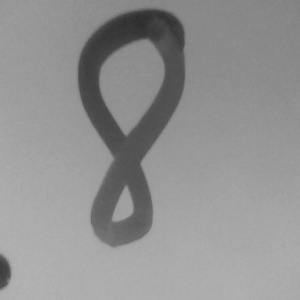

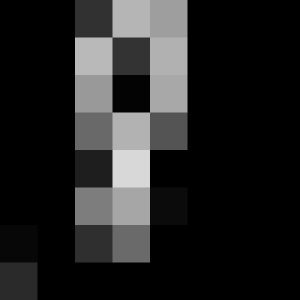

Kết quả học được:  8
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 71 ]


<IPython.core.display.Javascript object>

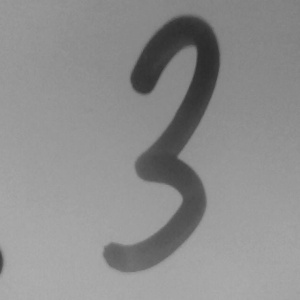

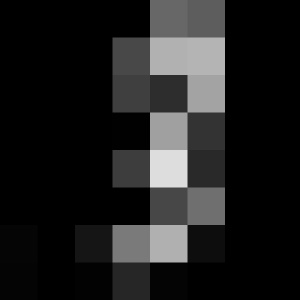

Kết quả học được:  7
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 72 ]


<IPython.core.display.Javascript object>

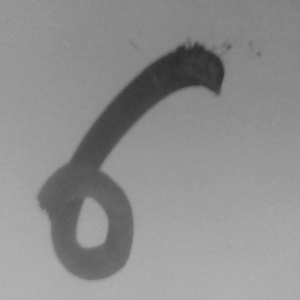

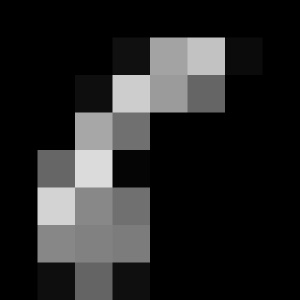

Kết quả học được:  4
Kết quả đúng của hình là: 6
Nhập 1 để tiếp tục : 1
Input [ 73 ]


<IPython.core.display.Javascript object>

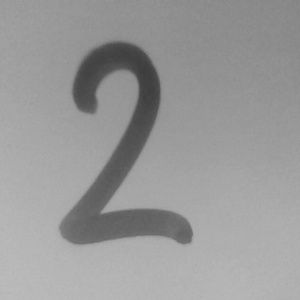

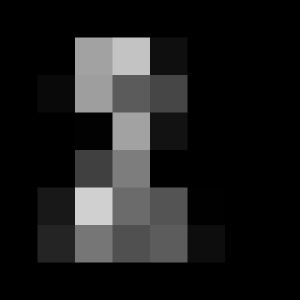

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 74 ]


<IPython.core.display.Javascript object>

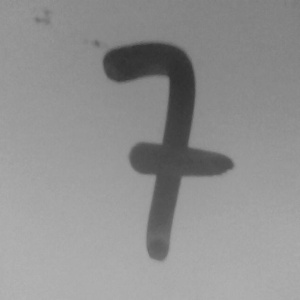

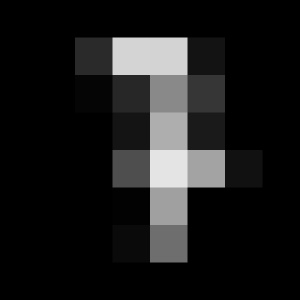

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 75 ]


<IPython.core.display.Javascript object>

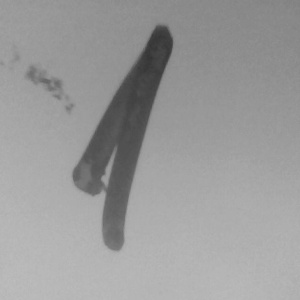

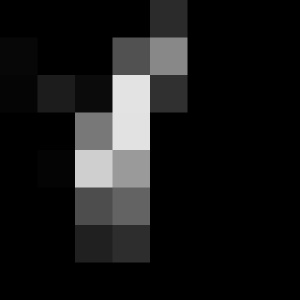

Kết quả học được:  4
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 76 ]


<IPython.core.display.Javascript object>

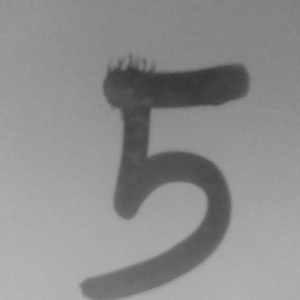

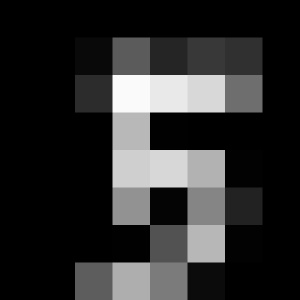

Kết quả học được:  8
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 77 ]


<IPython.core.display.Javascript object>

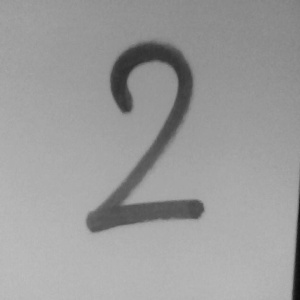

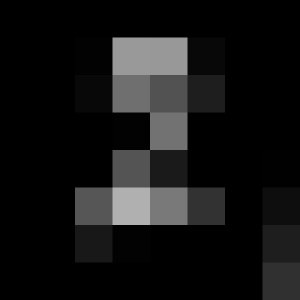

Kết quả học được:  7
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 78 ]


<IPython.core.display.Javascript object>

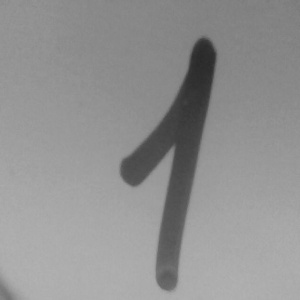

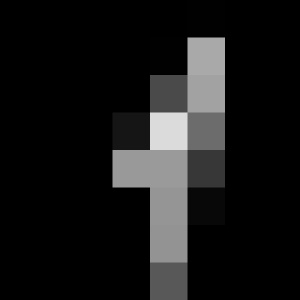

Kết quả học được:  9
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 79 ]


<IPython.core.display.Javascript object>

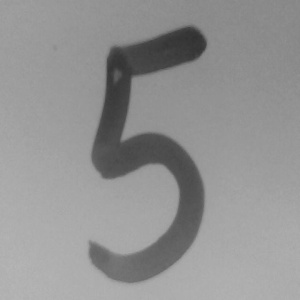

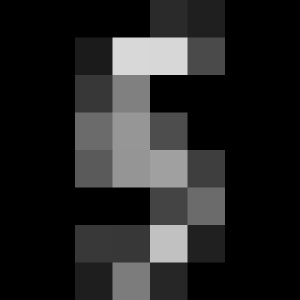

Kết quả học được:  5
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 80 ]


<IPython.core.display.Javascript object>

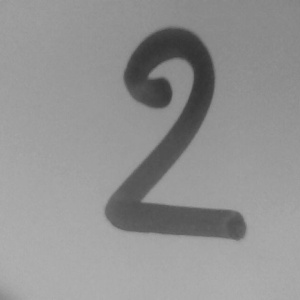

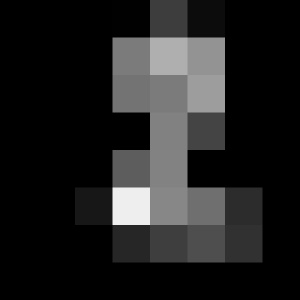

Kết quả học được:  7
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 81 ]


<IPython.core.display.Javascript object>

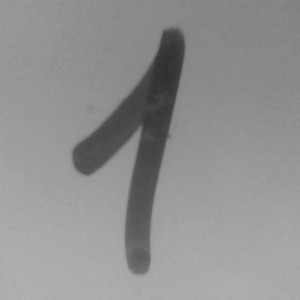

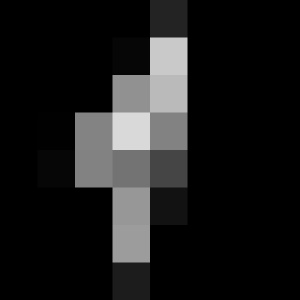

Kết quả học được:  1
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 82 ]


<IPython.core.display.Javascript object>

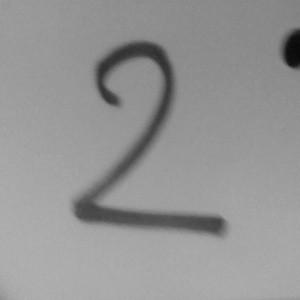

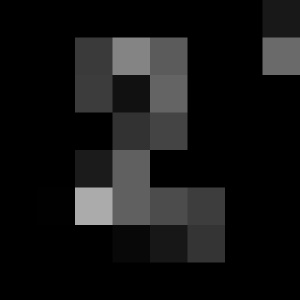

Kết quả học được:  8
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 83 ]


<IPython.core.display.Javascript object>

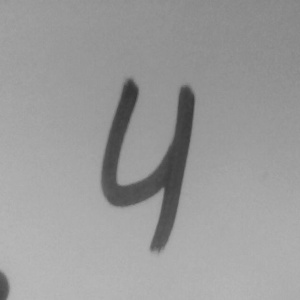

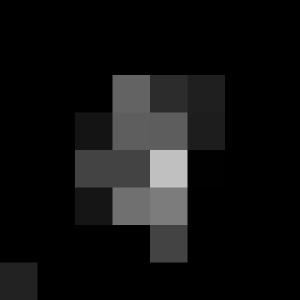

Kết quả học được:  7
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 84 ]


<IPython.core.display.Javascript object>

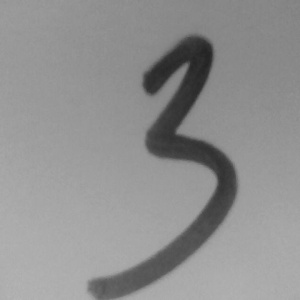

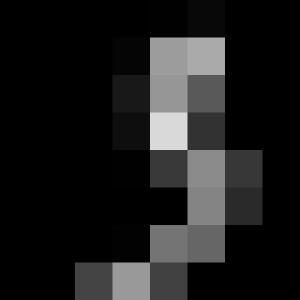

Kết quả học được:  3
Kết quả đúng của hình là: 3
Nhập 1 để tiếp tục : 1
Input [ 85 ]


<IPython.core.display.Javascript object>

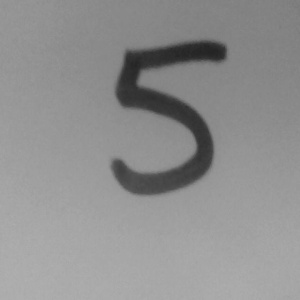

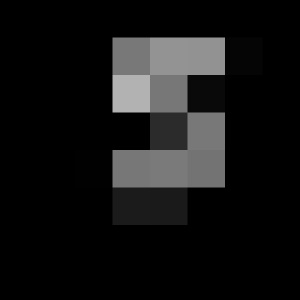

Kết quả học được:  7
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 86 ]


<IPython.core.display.Javascript object>

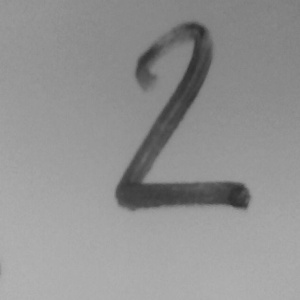

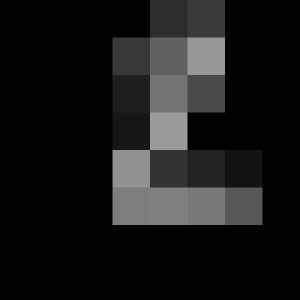

Kết quả học được:  7
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 87 ]


<IPython.core.display.Javascript object>

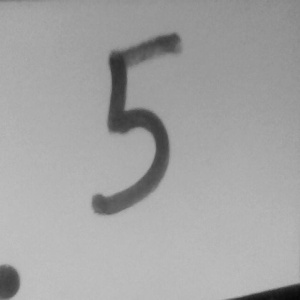

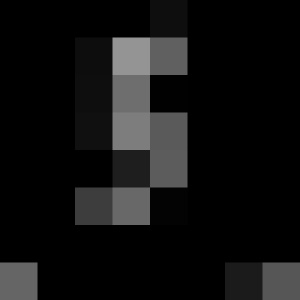

Kết quả học được:  7
Kết quả đúng của hình là: 5
Nhập 1 để tiếp tục : 1
Input [ 88 ]


<IPython.core.display.Javascript object>

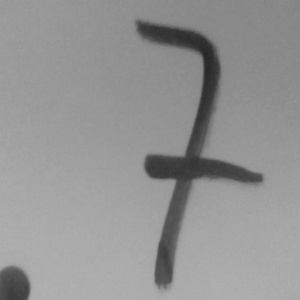

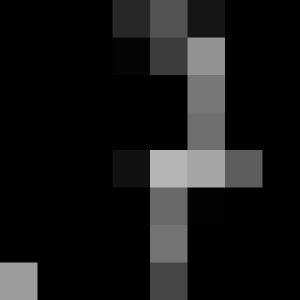

Kết quả học được:  7
Kết quả đúng của hình là: 7
Nhập 1 để tiếp tục : 1
Input [ 89 ]


<IPython.core.display.Javascript object>

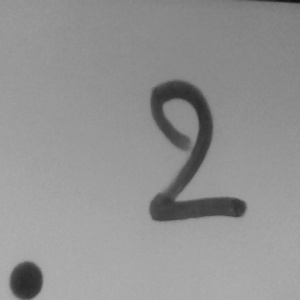

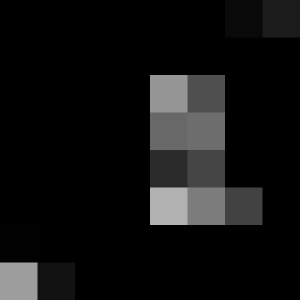

Kết quả học được:  9
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 1
Input [ 90 ]


<IPython.core.display.Javascript object>

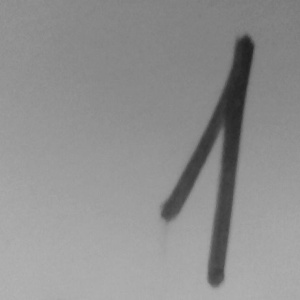

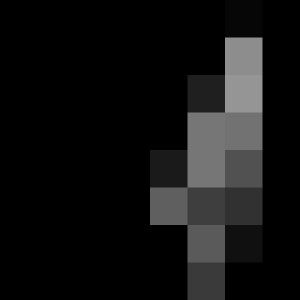

Kết quả học được:  7
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 91 ]


<IPython.core.display.Javascript object>

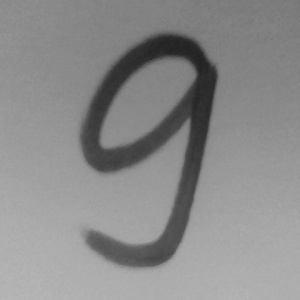

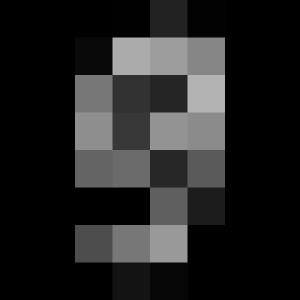

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 92 ]


<IPython.core.display.Javascript object>

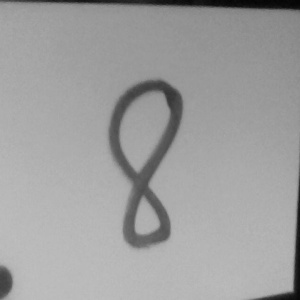

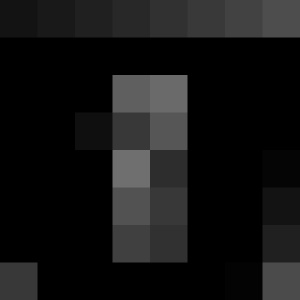

Kết quả học được:  7
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 93 ]


<IPython.core.display.Javascript object>

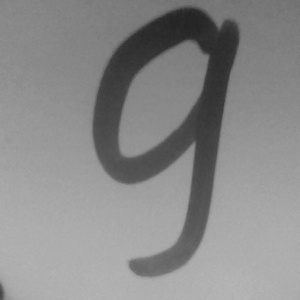

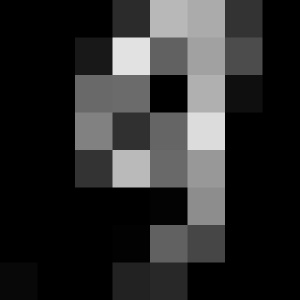

Kết quả học được:  9
Kết quả đúng của hình là: 9
Nhập 1 để tiếp tục : 1
Input [ 94 ]


<IPython.core.display.Javascript object>

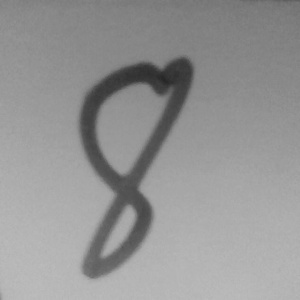

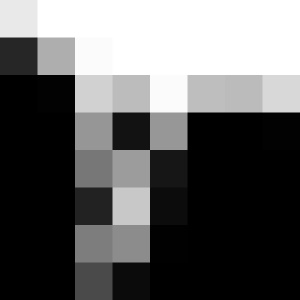

Kết quả học được:  7
Kết quả đúng của hình là: 8
Nhập 1 để tiếp tục : 1
Input [ 95 ]


<IPython.core.display.Javascript object>

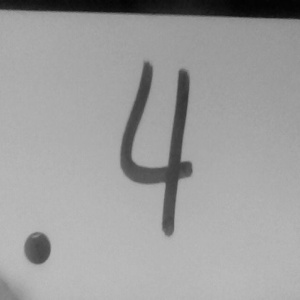

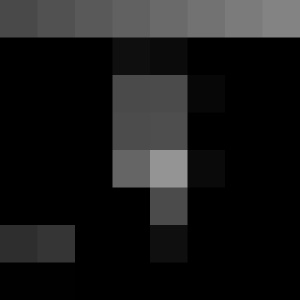

Kết quả học được:  7
Kết quả đúng của hình là: 4
Nhập 1 để tiếp tục : 1
Input [ 96 ]


<IPython.core.display.Javascript object>

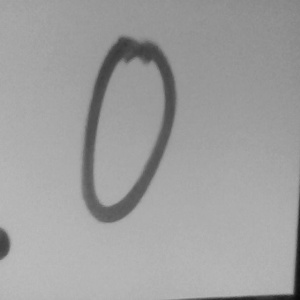

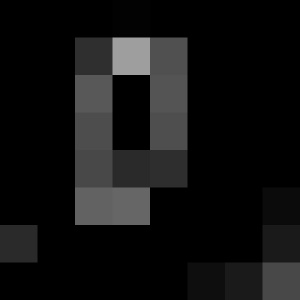

Kết quả học được:  9
Kết quả đúng của hình là: 0
Nhập 1 để tiếp tục : 1
Input [ 97 ]


<IPython.core.display.Javascript object>

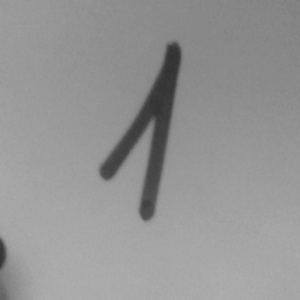

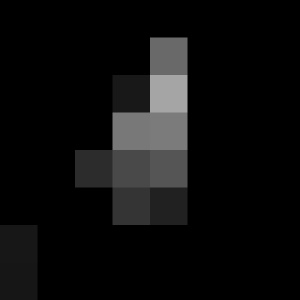

Kết quả học được:  9
Kết quả đúng của hình là: 1
Nhập 1 để tiếp tục : 1
Input [ 98 ]


<IPython.core.display.Javascript object>

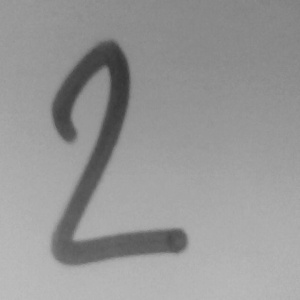

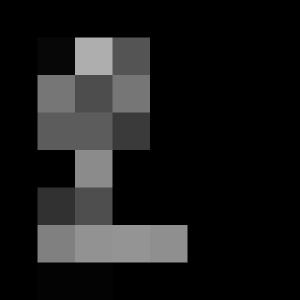

Kết quả học được:  5
Kết quả đúng của hình là: 2
Nhập 1 để tiếp tục : 
invalid literal for int() with base 10: ''


In [ ]:
from IPython.display import Image
Result = {
  True: 0,
  False: 0
}
try:
  while True:
    print("Input [",Result[True]+Result[False],"]")
    filename = take_photo()
    show(filename)
    # Show the image which was just taken.
    XULYANH(filename)
    r1 = getResult(filename)
    print("Kết quả học được: ", r1)
    r2 = int(input("Kết quả đúng của hình là: "))
    Result[r1==r2] += 1
    if int(input("Nhập 1 để tiếp tục : ")) != 1:
      break
    print("=======================================")
except Exception as err:
# Errors will be thrown if the user does not have a webcam or if they do not
# grant the page permission to access it.
  print(str(err))

# B. YÊU CẦU PHÂN TÍCH

## 0. Nhận xét cơ bản về kết quả chạy được:
- Input: 99 tấm ảnh chụp từ webcam máy tính về chữ số viết tay, trên nền trắng. với nỗ lực về điều kiện ánh sáng tốt nhất
- Kết quả đúng: 45/99
- Kết quả sai: 54/99

In [ ]:
Result[True]

45

In [ ]:
Result[False]

54

## 1. Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
 - Trả lời: Kết quả không tốt

## 2. Ủa mà nhìn vào đâu để kết luận là tốt hay không?
  - Dựa vào tỉ lệ đúng/sai của Output: Tỉ lệ đúng của việc chạy thực tế từ ảnh chụp chữ viết tay qua webcam chỉ có 45/99 ≈ 45% ít hơn tỉ lệ sai là 10%.

### 2.1 Nếu không tốt thì lý do tại sao?
  - Vấn đề về thuật toán:
    - Có thể là thuật toán xử lý ảnh trước khi đưa vào hàm predict khác biệt, và tạo ra kết quả khác như khi làm dataset để train và test.
    - Thuật toán xử lý ảnh từ webcam chưa đủ mạnh để loại bỏ các thành phân gây nhiễu:
      - Có thể cần crop ảnh để xóa bỏ những thành phần cần thiết
      - Chưa xử lý ảnh khi bị lệch 
    - Do vấn đề về xử lý ảnh nên cũng có các yếu tố đi kèm khác chẳng hạn như ánh sáng, chất lượng webcam.
  - Vấn đề về data:
    - Có thể là do file ảnh train có kích thước nhỏ, chỉ có 8x8 không đủ để xem xét các trường hợp khác của chữ số.
    - Bộ dataset còn nhỏ, vì chữ viết của mỗi người khác nhau.
    
### 2.2 Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
  - Giả sử thuật toán này tốt, thì không thể áp dụng cho bài toán nhận diện số nhà vì số nhà bao gồm chữ và số ngoài ra còn có kí hiệu "/", do vậy bài toán này cần có một tập dữ liệu train khác, ngoài ra còn phải nhận diện nhiều số, chữ và cả background. Output là một chuỗi chứ không phải là 1 kí tự. Do vậy theo nhóm em thì không áp dụng được
